In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
df141 = pd.read_csv('141everything.csv')
df141['datetime'] = df141.datetime.apply(pd.to_datetime)

In [43]:
df141

,Unnamed: 0,h3_h3_dt,h3_h3_depth,id,h3_h4_dt,h3_h4_depth,h3_h5_dt,h3_h5_depth,h3_h6_dt,h3_h6_depth,...,h5_h6_depth,h6_h3_dt,h6_h3_depth,h6_h4_dt,h6_h4_depth,h6_h5_dt,h6_h5_depth,h6_h6_dt,h6_h6_depth,datetime
0,0,0.0,NaN,0,0.185,366.875,0.185,366.875,-0.209,22.125,...,0.250,0.209,232.125,0.394,70.250,0.394,70.250,0.0,NaN,2019-05-21 07:38:10.208000+00:00
1,1,0.0,NaN,1,-0.041,169.125,0.181,363.375,0.181,363.375,...,345.000,-0.181,573.375,-0.222,609.250,0.000,415.000,0.0,NaN,2019-05-21 07:38:11.526000+00:00
2,2,0.0,NaN,2,-0.041,169.125,0.091,284.625,0.091,284.625,...,345.000,-0.091,494.625,-0.132,530.500,0.000,415.000,0.0,NaN,2019-05-21 07:38:11.605000+00:00
3,3,0.0,NaN,3,-0.046,164.750,0.164,348.500,0.174,357.250,...,353.750,-0.174,567.250,-0.220,607.500,-0.010,423.750,0.0,NaN,2019-05-21 07:38:12.754000+00:00
4,4,0.0,NaN,4,0.380,537.500,0.390,546.250,0.390,546.250,...,345.000,-0.390,756.250,-0.010,423.750,0.000,415.000,0.0,NaN,2019-05-21 07:38:12.935000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2949,0.0,NaN,2949,0.066,262.750,0.107,298.625,0.146,332.750,...,379.125,-0.146,542.750,-0.080,485.000,-0.039,449.125,0.0,NaN,2019-05-21 08:37:48.513000+00:00
2950,2950,0.0,NaN,2950,0.066,262.750,0.107,298.625,0.146,332.750,...,379.125,-0.146,542.750,-0.080,485.000,-0.039,449.125,0.0,NaN,2019-05-21 08:37:48.590000+00:00
2951,2951,0.0,NaN,2951,0.066,262.750,0.107,298.625,0.151,337.125,...,383.500,-0.151,547.125,-0.085,489.375,-0.044,453.500,0.0,NaN,2019-05-21 08:37:48.685000+00:00
2952,2952,0.0,NaN,2952,0.068,264.500,0.109,300.375,0.146,332.750,...,377.375,-0.146,542.750,-0.078,483.250,-0.037,447.375,0.0,NaN,2019-05-21 08:37:49.365000+00:00


/localscratch/819517/ipykernel_3680820/2124878133.py:17: RuntimeWarning: divide by zero encountered in divide
  ax[0].scatter(x, y, s=np.abs(1/y), alpha=0.5)
/localscratch/819517/ipykernel_3680820/2124878133.py:20: RuntimeWarning: divide by zero encountered in divide
  ax[1].scatter(x, y, s=np.abs(1/y), alpha=0.5)
/localscratch/819517/ipykernel_3680820/2124878133.py:23: RuntimeWarning: divide by zero encountered in divide
  ax[2].scatter(x, y, s=np.abs(1/y), alpha=0.5)


(2954, 3)


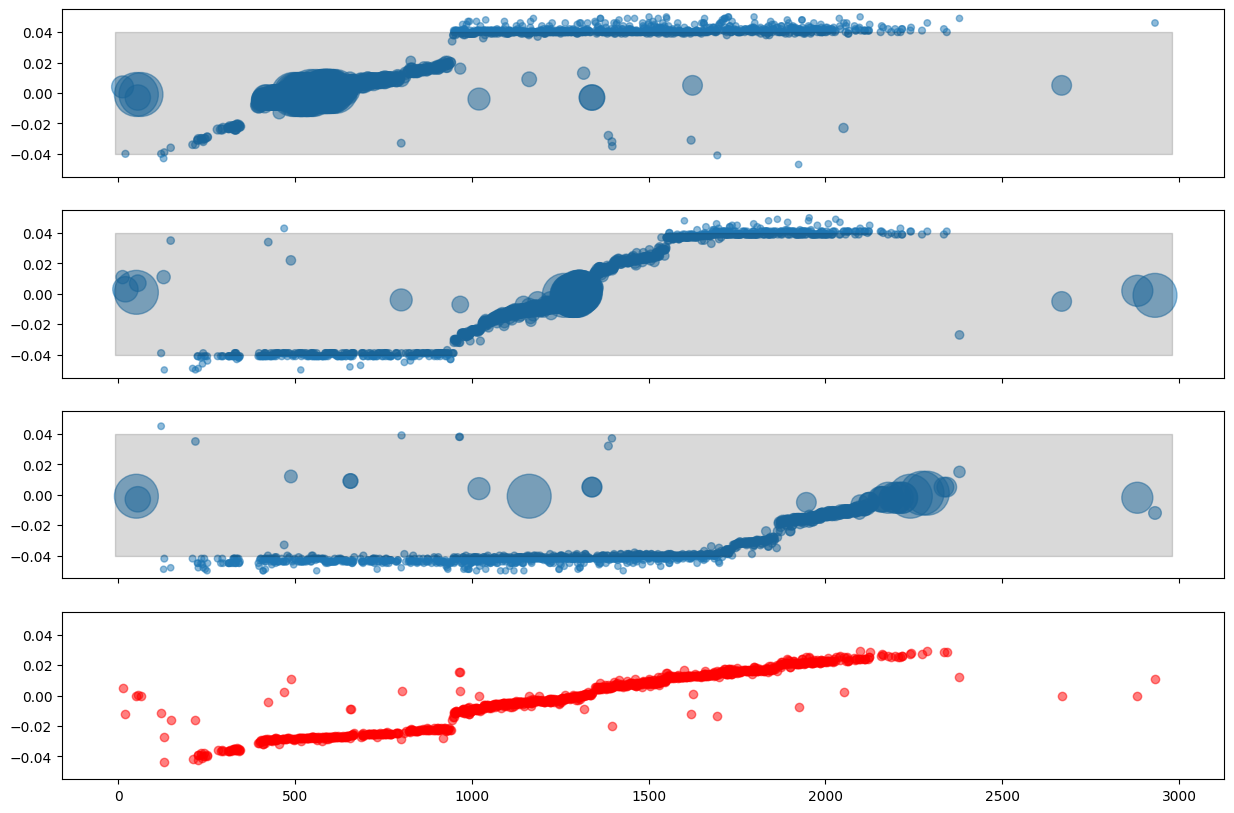

In [44]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True, sharey=True)

# this is way too strict
# data = df211[df211.h3_h4_dt.between(-0.05, 0.05)]
# data = data[data.h4_h5_dt.between(-0.05, 0.05)]
# data = data[data.h5_h6_dt.between(-0.05, 0.05)]
data = df141[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']].copy()
data[~data.h3_h4_dt.between(-0.05, 0.05)] = np.nan
data[~data.h4_h5_dt.between(-0.05, 0.05)] = np.nan
data[~data.h5_h6_dt.between(-0.05, 0.05)] = np.nan



x = data.index

y = data.h3_h4_dt.values
ax[0].scatter(x, y, s=np.abs(1/y), alpha=0.5)

y = data.h4_h5_dt.values
ax[1].scatter(x, y, s=np.abs(1/y), alpha=0.5)

y = data.h5_h6_dt.values
ax[2].scatter(x, y, s=np.abs(1/y), alpha=0.5)


y = data[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']].mean(axis=1)
ax[3].scatter(x, y, color='red', alpha=0.5,)


# df211.h3_h4_dt.plot(ax=ax[0])
# df211.h4_h5_dt.plot(ax=ax[1], marker='.', markersize=df211.h4_h5_dt.apply(lambda t: 100 if abs(t) < 0.04 else 0.001))
# df211.h5_h6_dt.plot(ax=ax[2], marker='.', markersize=df211.h5_h6_dt.apply(lambda t: 100 if abs(t) < 0.04 else 0.001))

# df211.h4_h3_dt.plot(ax=ax[0])
# df211.h5_h4_dt.plot(ax=ax[1])
# df211.h6_h5_dt.plot(ax=ax[2])

ax[0].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)
ax[1].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)
ax[2].fill_between(x=(-10, data.shape[0]+25), y1=-0.04, y2=0.04, color='black', alpha=0.15)

print(data.shape)

#this is tricking me because it is not depths it is only the calculations...
#you have to do this for depths 

<Axes: >

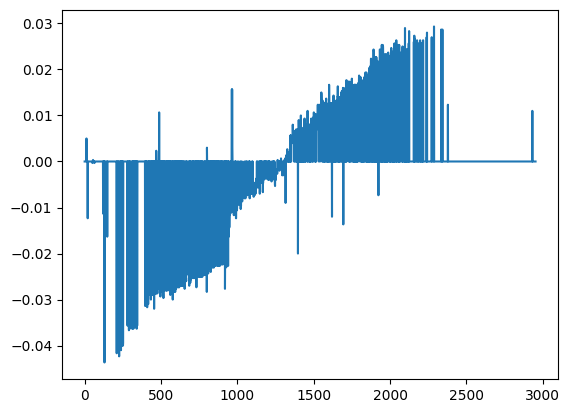

In [45]:
def calc_mean_with_nan(vals):
    vals[np.isnan(vals)] = 0
    return np.mean(vals)

data.apply(lambda row: calc_mean_with_nan(row), axis=1).plot()

<Axes: >

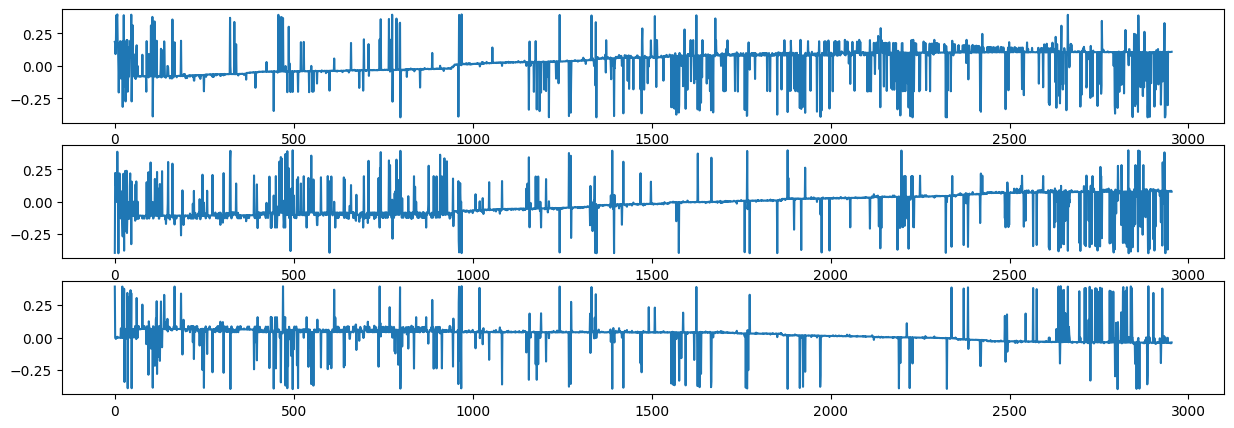

In [46]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5))

df141.h3_h5_dt.plot(ax=ax[0])
df141.h4_h6_dt.plot(ax=ax[1])
df141.h6_h5_dt.plot(ax=ax[2])

<Axes: >

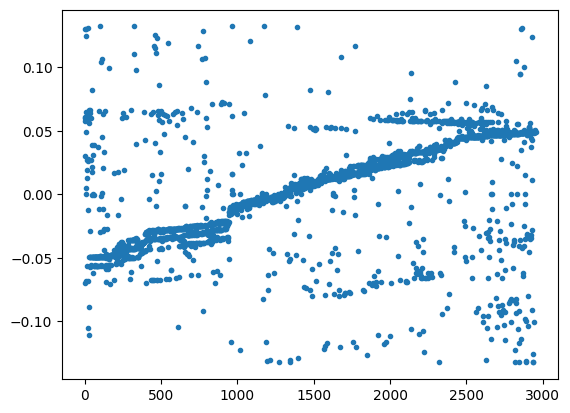

In [47]:
data = df141[['h3_h4_dt', 'h4_h5_dt', 'h5_h6_dt']]

# (data.abs() > 0.05).sum(axis=1)
data.mean(axis=1).plot(marker='.', linestyle='')

(400.0, 150.0)

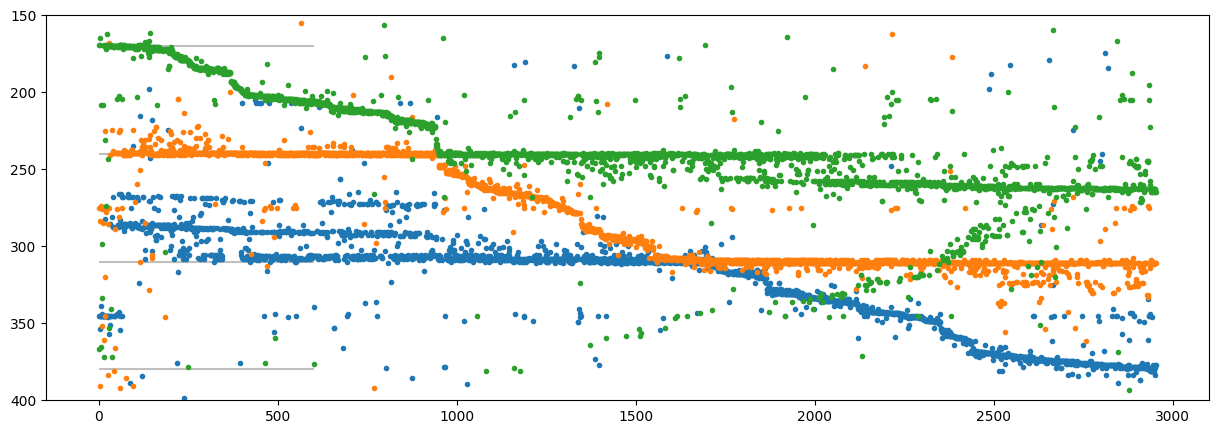

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
df141.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
df141.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
df141.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

hdepths = [30, 100, 170, 240, 310, 380]

for hd in hdepths:
    ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

ax.set_ylim(400, 150)

<Axes: >

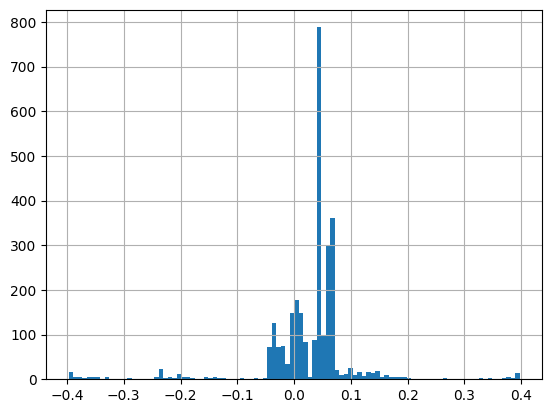

In [49]:
df141.h3_h4_dt.hist(bins=100)

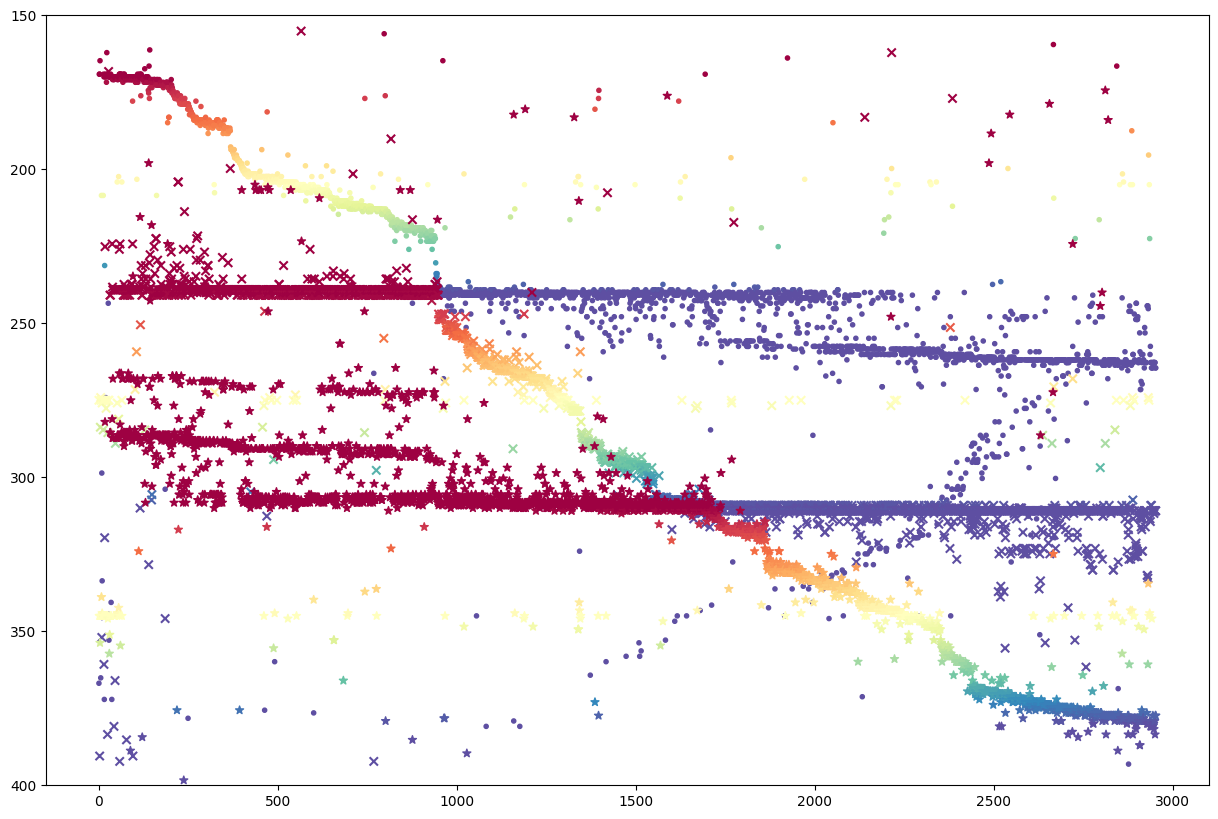

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))

x = df141.index

d56 = df141.h5_h6_depth.values
d45 = df141.h4_h5_depth.values
d34 = df141.h3_h4_depth.values

ax.scatter(x, d34, c=df141.h3_h4_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='.')
ax.scatter(x, d45, c=df141.h4_h5_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='x')
ax.scatter(x, d56, c=df141.h5_h6_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='*')

# df141.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
# df141.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
# df141.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

ax.set_ylim(400, 150)

hdepths = [30, 100, 170, 240, 310, 380]

# for hd in hdepths:
#     ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

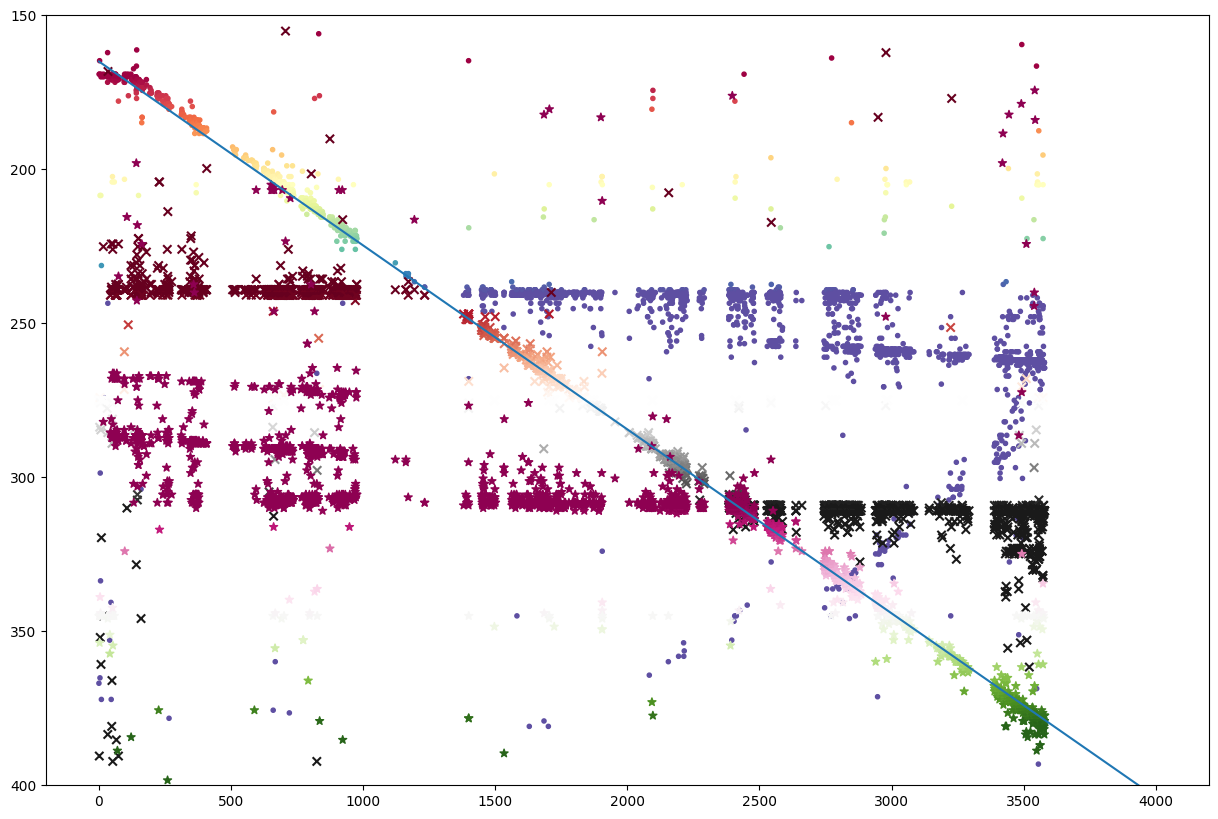

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))

t = df141.datetime.apply(pd.to_datetime).diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum()

d56 = df141.h5_h6_depth.values
d45 = df141.h4_h5_depth.values
d34 = df141.h3_h4_depth.values

ax.scatter(t, d34, c=df141.h3_h4_dt.values, cmap='Spectral', vmin=-0.04, vmax=0.04, marker='.')
ax.scatter(t, d45, c=df141.h4_h5_dt.values, cmap='RdGy', vmin=-0.04, vmax=0.04, marker='x')
ax.scatter(t, d56, c=df141.h5_h6_dt.values, cmap='PiYG', vmin=-0.04, vmax=0.04, marker='*')

# df141.h5_h6_depth.plot(label='h5-h6', marker='.', linestyle='')
# df141.h4_h5_depth.plot(label='h4-h5', marker='.', linestyle='')
# df141.h3_h4_depth.plot(label='h3-h4', marker='.', linestyle='')

ax.set_ylim(400, 150)

hdepths = [30, 100, 170, 240, 310, 380]

x = np.linspace(0, 4000, 100)
y = 165 + (390 - 175)/3600 * x
ax.plot(x, y)

# for hd in hdepths:
#     ax.hlines(y=hd, xmin=0, xmax=600, color='black', zorder=0, alpha=0.25)

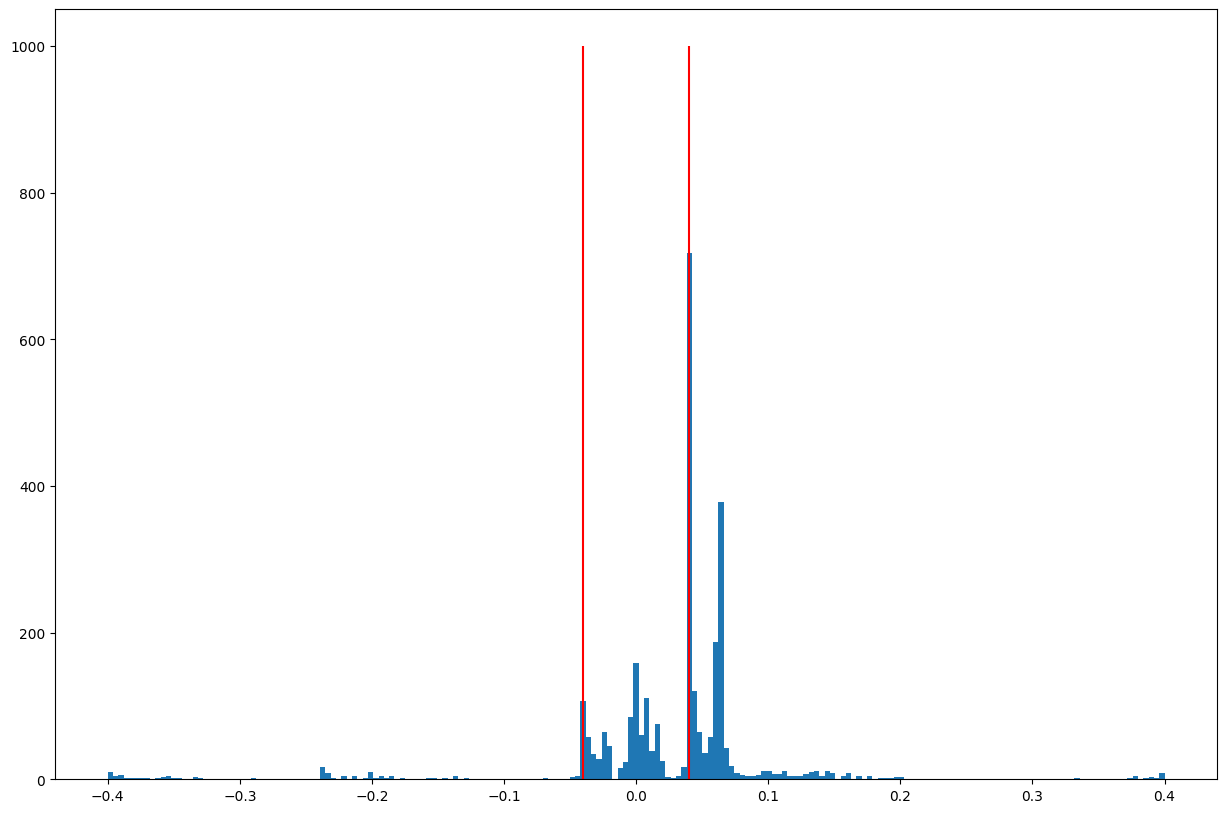

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))

d34 = df141.h3_h4_depth.values
d34_t = df141.h3_h4_dt.values

# ax.scatter(d34_t, d34)
ax.hist(d34_t, bins=np.linspace(-0.4, 0.4, 200))
ax.vlines(x=(-0.04, 0.04), ymin=0, ymax=1000, color='red')

(849, 3)

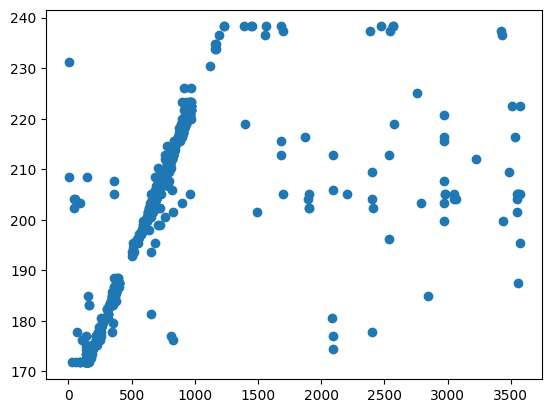

In [61]:
fig, ax = plt.subplots()

data34 = df141[['h3_h4_dt', 'h3_h4_depth', 'datetime']].copy()

data34 = data34[data34.h3_h4_dt.between(-0.038, 0.038)].copy()

t = data34.datetime.diff().apply(lambda t: t.total_seconds())

ax.scatter(t.cumsum(), data34.h3_h4_depth.values)
data34.shape

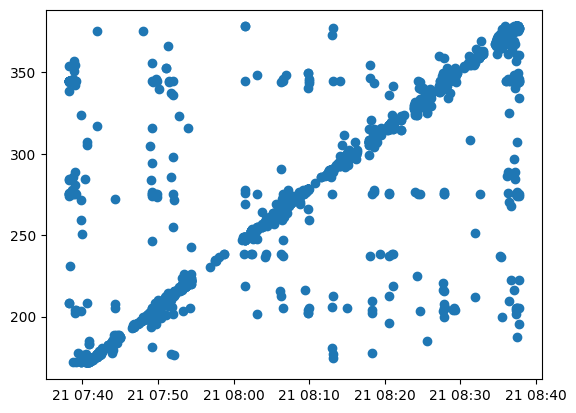

In [71]:
data34 = df141[['h3_h4_dt', 'h3_h4_depth', 'datetime']].copy()
data45 = df141[['h4_h5_dt', 'h4_h5_depth', 'datetime']].copy()
data56 = df141[['h5_h6_dt', 'h5_h6_depth', 'datetime']].copy()

data34 = data34[data34.h3_h4_dt.between(-0.038, 0.038)].copy()
data45 = data45[data45.h4_h5_dt.between(-0.038, 0.038)].copy()
data56 = data56[data56.h5_h6_dt.between(-0.038, 0.038)].copy()

data_idx = pd.concat([data34, data45, data56]).index

depths = np.concatenate([data34.h3_h4_depth.values
                         ,data45.h4_h5_depth.values
                         ,data56.h5_h6_depth.values
                        ])
times = df141.datetime.loc[data_idx].values

fig, ax = plt.subplots()

ax.scatter(times, depths)

In [64]:
np.concatenate([[1,2], [3,4]])

array([1, 2, 3, 4])